
**Pascal airline tracker**



 Pascal Airline tracker is an tracking company that provides airtravel tracking serivices only in United States

**Business Process Flow**

Below figure shows the company's business process flow.


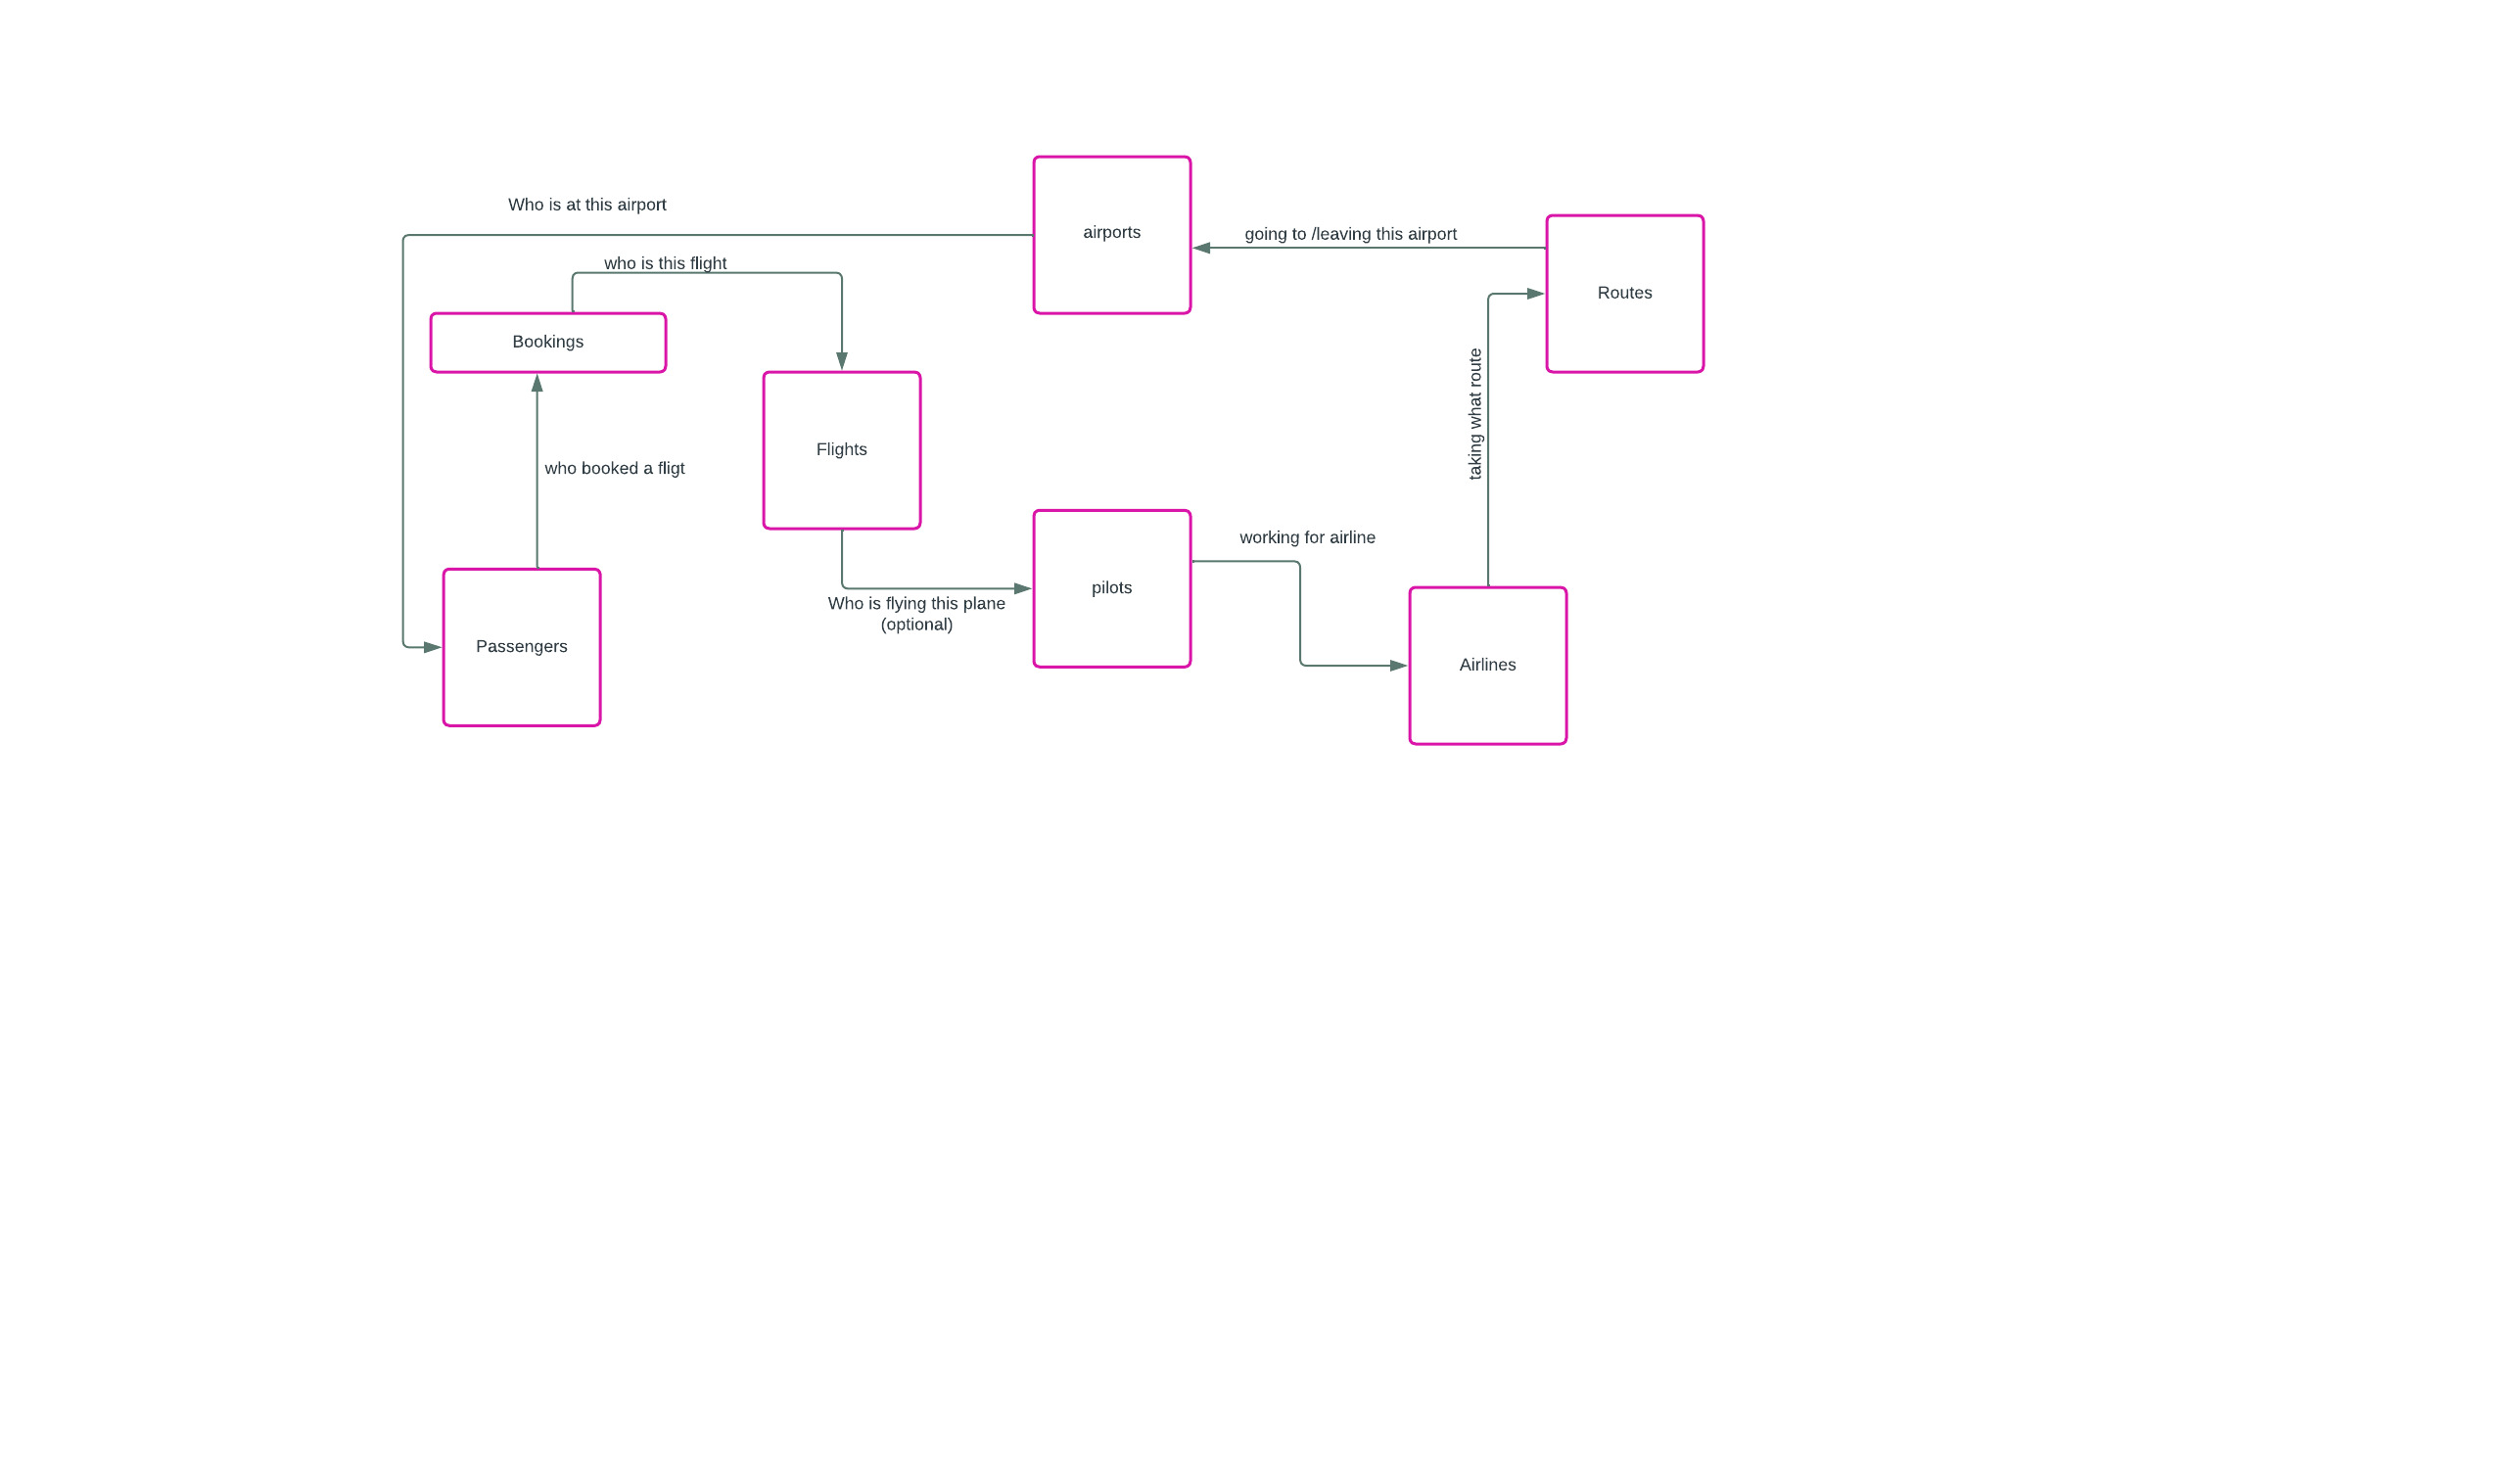

In [14]:
display.Image("/Users/pascalizere/Desktop/files/DE/data/model.jpeg")

**Entity Relationship Diagram**

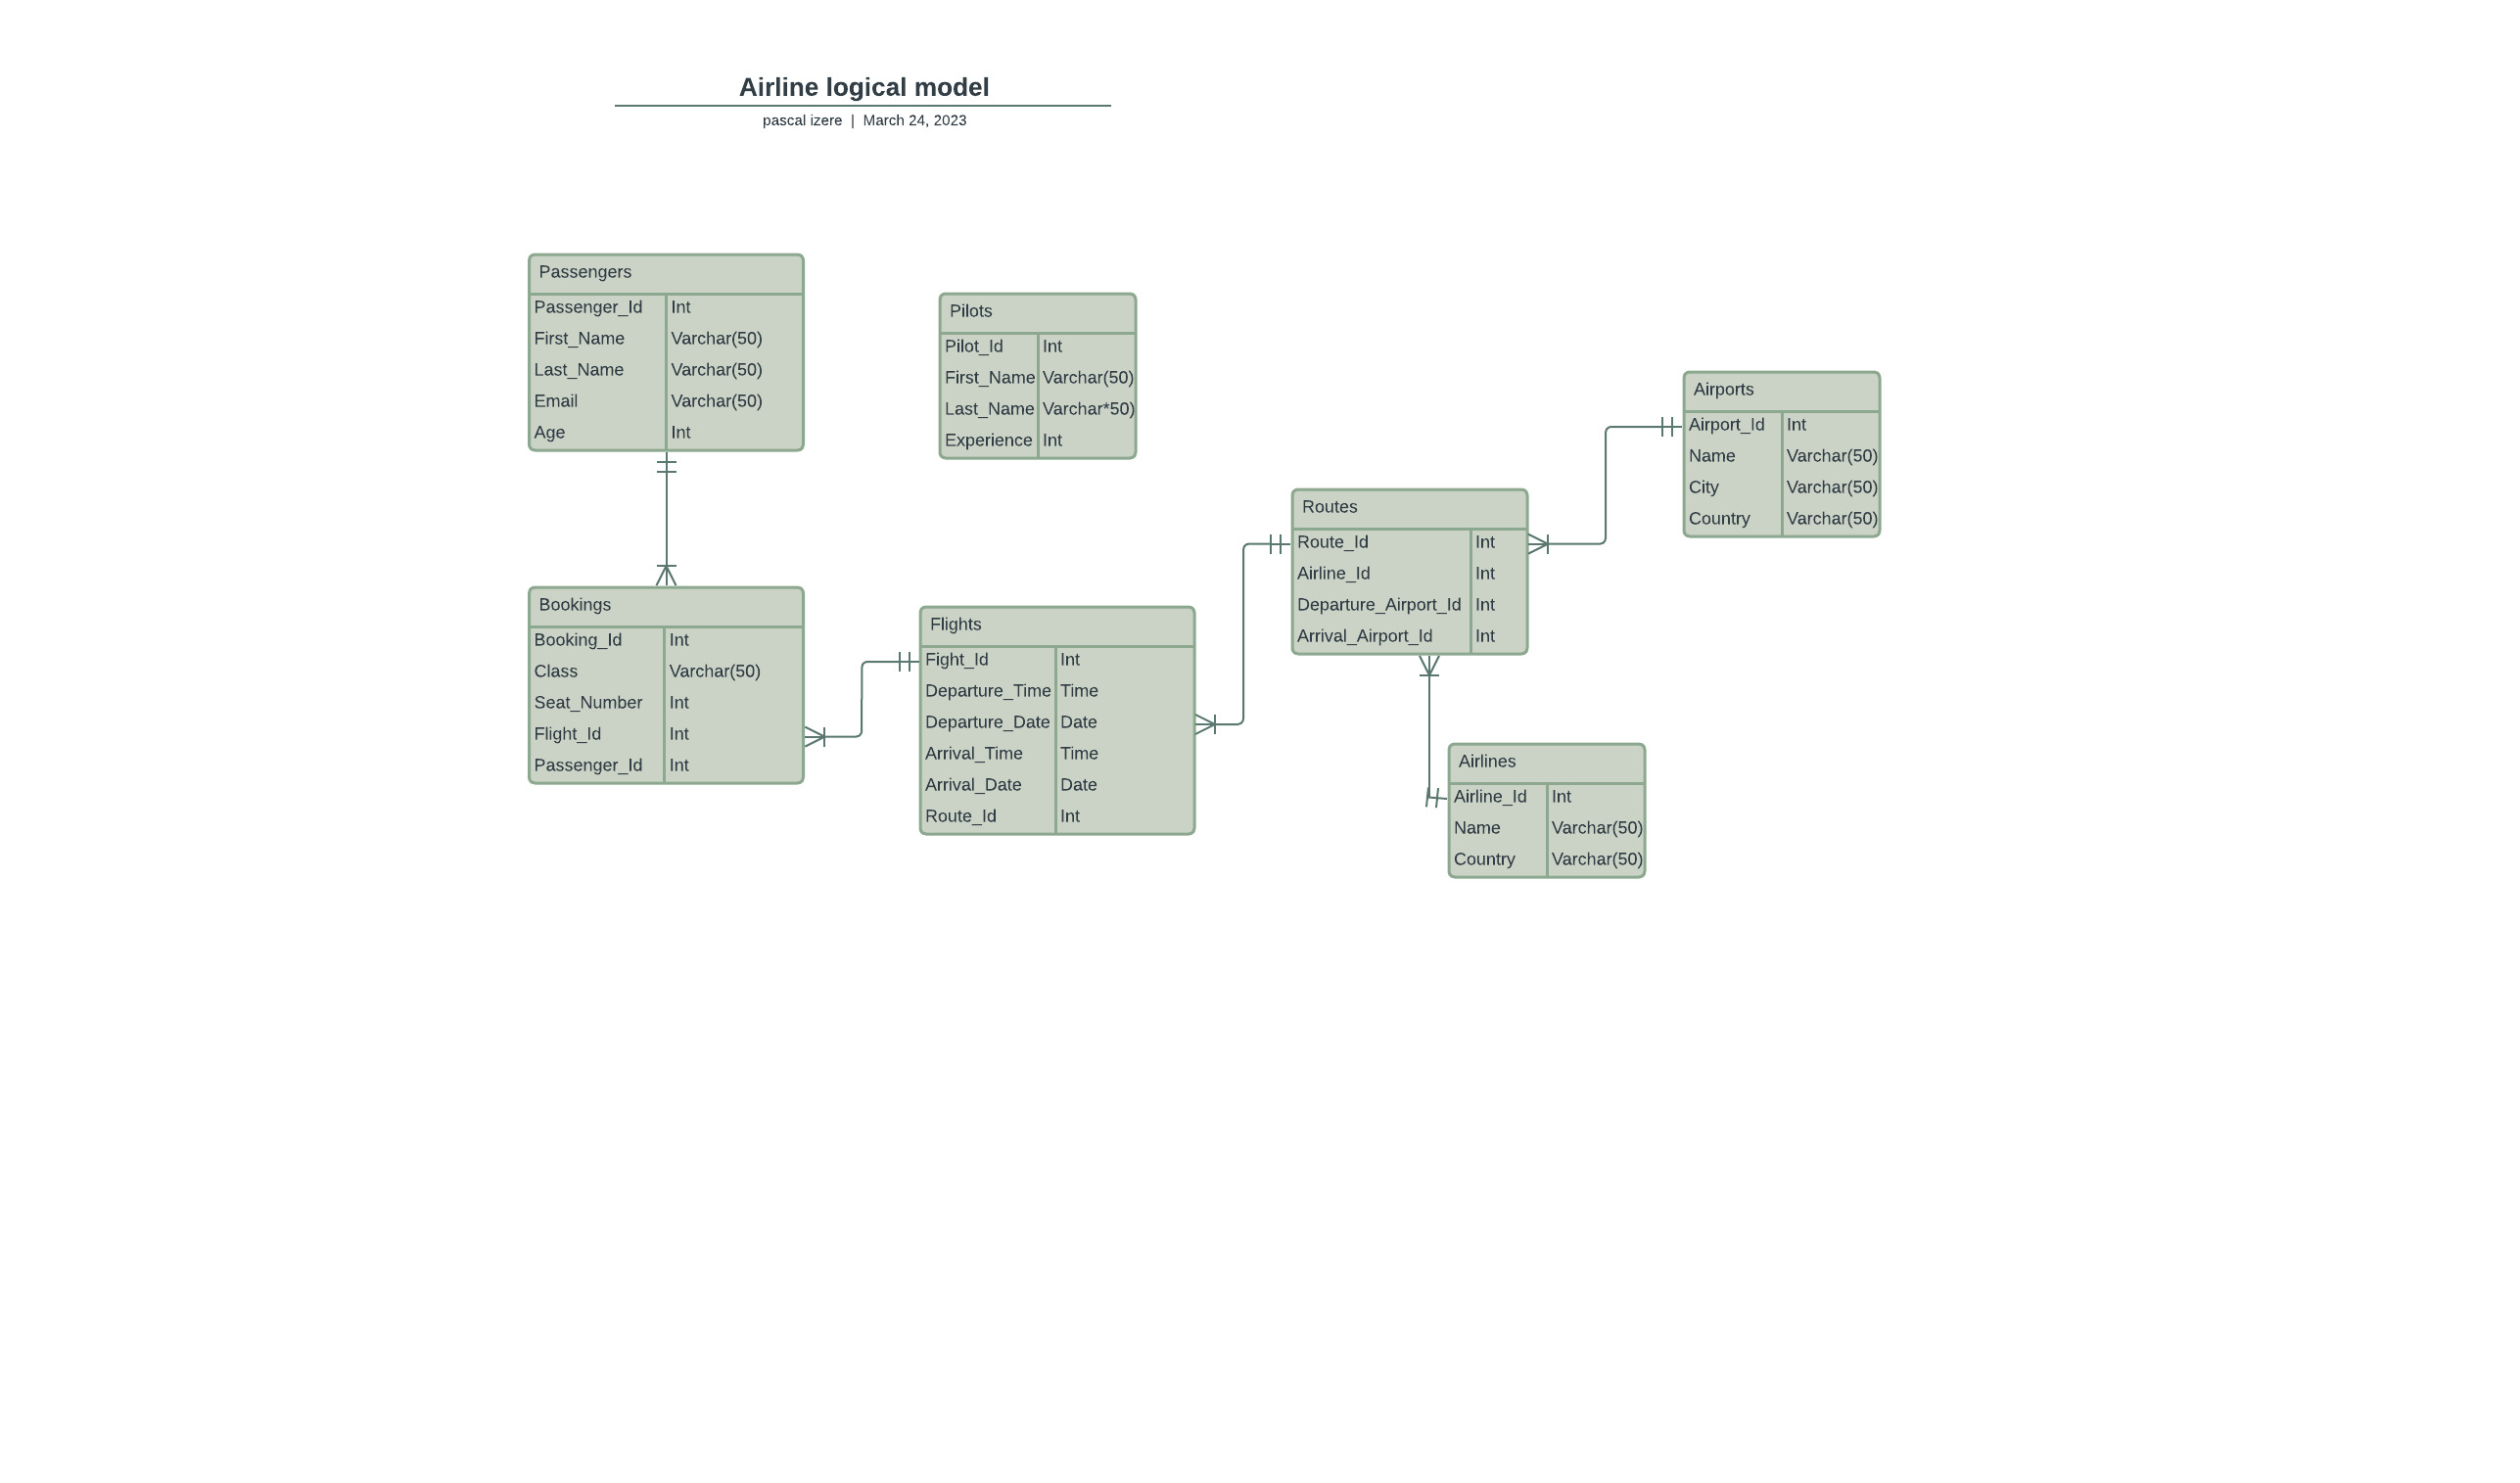

In [9]:
display.Image("/Users/pascalizere/Desktop/files/DE/data/Airline_logical_model.jpeg")


In [7]:
# packages
from IPython import display
import psycopg2
import requests
import pandas as pd
import json
import numpy as np
from faker import Faker
import csv
import random

**Database DDL**

In [ ]:



# Define SQL commands to create tables
create_passenger_table1 = """

CREATE TABLE IF NOT EXISTS Passenger(
  Passenger_Id SERIAL PRIMARY KEY,
  First_Name VARCHAR(500) NOT NULL,
  Last_Name VARCHAR(500) NOT NULL,
  Email VARCHAR(500) NOT NULL,
  Age INT
);
"""

create_passenger_table2 = """

CREATE TABLE IF NOT EXISTS Airlines(
  Airline_Id SERIAL PRIMARY KEY,
  Name VARCHAR(500),
  Country VARCHAR(500)
);
"""

create_passenger_table3 = """

CREATE TABLE IF NOT EXISTS Airports(
  Airport_Id SERIAL PRIMARY KEY,
  Name VARCHAR(500) NOT NULL,
  City VARCHAR(500) NOT NULL,
  Country VARCHAR(500) NOT NULL
);
"""

create_passenger_table4 = """

CREATE TABLE IF NOT EXISTS Routes(
  Route_Id SERIAL PRIMARY KEY,
  Airline_Id INT NOT NULL REFERENCES Airlines(Airline_Id),
  Departure_Airport_Id INT NOT NULL REFERENCES Airports(Airport_Id),
  Arrival_Airport_Id INT NOT NULL REFERENCES Airports(Airport_Id)
);
"""

create_passenger_table5 = """

CREATE TABLE IF NOT EXISTS Flights(
  Flight_Id SERIAL PRIMARY KEY,
  Departure_Time TIME NOT NULL,
  Departure_Date DATE NOT NULL,
  Arrival_Time TIME NOT NULL,
  Arrival_Date DATE NOT NULL,
  Route_Id INT NOT NULL REFERENCES Routes(Route_Id)
);
"""

create_passenger_table6 = """

CREATE TABLE IF NOT EXISTS Bookings(
  Booking_Id SERIAL PRIMARY KEY,
  Class VARCHAR(500) NOT NULL,
  Seat_Number INT NOT NULL,
  Flight_Id INT NOT NULL REFERENCES Flights(Flight_Id),
  Passenger_Id INT NOT NULL REFERENCES Passenger(Passenger_Id)
);
"""

create_passenger_table7 = """

CREATE TABLE IF NOT EXISTS Pilots(
  Pilot_Id SERIAL PRIMARY KEY,
  First_Name VARCHAR(500) NOT NULL,
  Last_Name VARCHAR(500) NOT NULL,
  Experience INT NOT NULL
);
"""

***Data generation process***

**Passengers** :Datasets

In [95]:
#Creating lists to hold the generated data for each column
Passenger_id = []
First_name = []
Last_name= []
Email = []
Age = []
fake = Faker()
for i in range(29960):
        Passenger_id.append(fake.pyint(1,29960))
    
        First_name.append(fake.first_name())
   
        Last_name.append(fake.last_name())
 
        Email.append(fake.email())
   
        Age.append(fake.pyint(1,100))

       
df = pd.DataFrame(zip( Passenger_id, First_name,Last_name, Email,Age),columns=['Passenger_id','First_Fame','Last_Fame', 'Email', 'Age'])
#df.shape

df.to_csv('../DE/data/passengers.csv',index=False)

**Airlines** : Datasets

In [ ]:
#Downlaoding airports datasets from kaggle
!kaggle datasets download -d 'open-flights/airline-database '

In [ ]:
#unziping airports datasets 
!unzip airline-database.zip -d /Users/pascalizere/Desktop/files/DE

In [53]:
# original data from kaggle
airline = pd.read_csv('../DE/data/airlines.csv')

# Needed data from the file
realairlinedata = airline.loc[1:6000, ['Airline ID', 'Name', 'ICAO', 'Country']].dropna(subset=['Country','ICAO'])

# Renaming the 'Country' column to 'Airline Country'
realairlinedata = realairlinedata.rename(columns={'ICAO': 'Code'})
#Saving the data 
realairlinedata.to_csv('../DE/data/realairlinedata.csv', index=False)


***Airports***: datasets

In [64]:
# original data from kaggle
airports = pd.read_csv('../DE/data/airports.csv')

# Needed data from the file
realairportsdata = airports[['AIRPORT', 'CITY', 'COUNTRY', 'IATA_CODE']].dropna(subset=['COUNTRY', 'IATA_CODE'])
# Add the id_number column
realairportsdata['Airport_Id'] = range(1, len(realairportsdata) + 1)

# Renaming the 'COUNTRY' column to 'Airport Country'
realairportsdata = realairportsdata.rename(columns={'AIRPORT': 'Name','IATA_CODE': 'Code'})

# Append id_number new column to the file
realairportsdata.to_csv('../DE/data/realairportsdata.csv', index=False)

***Routes***: Datasets

In [ ]:
# original data from kaggle
routes = pd.read_csv('../DE/data/routes.csv')
routes

# Needed data from the file
routesdata = routes[['airline ID', ' source airport id',' destination airport id']]
# Add the id_number column

np.random.seed(42)
routesdata['Route_Id']  = np.random.randint(1, 1000, size=len(routesdata))

# Renaming the 'COUNTRY' column to 'Airport Country'
routesdata = routesdata.rename(columns={'airline ID': 'Airline_ID',' source airport id': 'Departure_Airport_Id',' destination airport id': 'Arrival_Airport_Id'})
# Append id_number new column to the file
routesdata.to_csv('../DE/data/routesdata.csv',header=False, index=False)


***Flights***: Datasets

In [92]:


# Define the range of possible departure and arrival times
departure_range = range(8, 22)
arrival_range = range(10, 24)
flights=[]
# Load the route data from the CSV file
with open('../DE/data/routesdata.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  # skip header row
    routes = list(reader)

# Generate 1000 random flights
for i in range(1000):
    # Choose a random route and extract the route ID
    route = random.choice(routes)
    Route_id = route[0]

    # Generate random departure and arrival times
    departure_hour = random.choice(departure_range)
    departure_minute = random.randint(0, 59)
    arrival_hour = random.choice(arrival_range)
    arrival_minute = random.randint(0, 59)

    # Format the dates and times
    departure_date = '2023-03-{}'.format(i + 1)
    departure_time = '{:02d}:{:02d}'.format(departure_hour, departure_minute)
    arrival_date = '2023-03-{}'.format(i + 2)
    arrival_time = '{:02d}:{:02d}'.format(arrival_hour, arrival_minute)

    # Output the flight data
    flight_id = (i + 1)
   
    flights.append([flight_id, departure_date, departure_time, arrival_date, arrival_time, Route_id])

# Write the flight data to a CSV file
with open('../DE/data/flight_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Flight_ID', 'Departure_Time', 'Departure_Date',  'Arrival_Time','Arrival_Date', 'Route_ID'])
    writer.writerows(flights)


***Bookings***: Datasets

In [101]:

# Load flight data from CSV file
with open('../DE/data/flight_data.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  # skip header row
    flights = list(reader)

# Load passenger data from CSV file
with open('../DE/data/passengers.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  # skip header row
    passengers = list(reader)

# Use Faker library to generate fake booking data
faker = Faker()

bookings = []
for i in range(5000):
    # Choose a random flight and extract flight ID and departure date
    flight = random.choice(flights)
    flight_id = flight[0]
   

    # Choose a random passenger and extract passenger ID
    passenger = random.choice(passengers)
    passenger_id = passenger[0]

    # Generate fake booking data
    booking_id = i+1
    seat_number = faker.random_int(1, 50)
    travel_class = faker.random_element(['Economy', 'Business', 'First'])
    
    # Append booking data to list of bookings
    bookings.append([booking_id, travel_class, seat_number, flight_id, passenger_id, ])

# Write booking data to CSV file
with open('../DE/data/bookingdata.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Booking_ID', 'Travel Class', 'Seat Number', 'Flight ID', 'Passenger ID', ])
    writer.writerows(bookings)



***Pilots***: Datasets

In [105]:

fake = Faker()

# Define the range of possible years of experience
experience_range = range(1, 31)

# Generate 10 random pilots
pilots = []
for i in range(2000):
    # Generate a random pilot ID
    pilot_id = random.randint(1000, 9999)

    # Generate a random first and last name
    first_name = fake.first_name()
    last_name = fake.last_name()

    # Generate a random years of experience
    experience = random.choice(experience_range)

    # Output the pilot data
    pilots.append([pilot_id, first_name, last_name, experience])

# Write the pilot data to a CSV file
header = ['Pilot_ID', 'First_Name', 'Last_Name', 'Experience']
with open('../DE/data/pilots.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(pilots)




***DATA Ingestion to Database***

In [ ]:

# Connect to the database
try:
    conn = psycopg2.connect(
        host='****',
        port=5432,
        user='****',
        password='***',
        database='***'
    )
    cur = conn.cursor()

    # Execute the SQL commands to create tables
    cur.execute(create_passenger_table1)
    cur.execute(create_passenger_table2)
    cur.execute(create_passenger_table3)
    cur.execute(create_passenger_table4)
    cur.execute(create_passenger_table5)
    cur.execute(create_passenger_table6)
    cur.execute(create_passenger_table7)
    # Commit the changes to the database
    conn.commit()

    print("Tables created successfully!")

except Exception as e:
    print(e)

finally:
    
     

     # insert data into passenger table
    with open('../DE/data/passengers.csv', 'r') as f:
        next(f)
        for line in f:
            row = line.strip().split(',')
            cur.execute('INSERT INTO passenger (Passenger_Id, First_Name, Last_Name, Email, Age) SELECT %s,%s,%s,%s,%s WHERE NOT EXISTS (SELECT 1 FROM passenger WHERE Passenger_Id = %s)', (row[0], row[1], row[2], row[3], row[4], row[0]))
    conn.commit()
   
    # insert data into airline table
    with open('../DE/data/realairlinedata.csv', 'r') as f:
        next(f)
        for line in f:
            row = line.strip().split(',')
            cur.execute('INSERT INTO airlines (Airline_Id, Name,  Country) SELECT %s,%s,%s WHERE NOT EXISTS (SELECT 1 FROM airlines WHERE Airline_Id = %s)', (row[0], row[1], row[2],  row[0]))
    conn.commit()
    # insert data into airport table
    with open('../DE/data/realairportsdata.csv', 'r') as f:
        next(f)
        for line in f:
            row = line.strip().split(',')
            cur.execute('INSERT INTO airports (Airport_Id, Name, City, Country ) SELECT %s,%s,%s,%s WHERE NOT EXISTS (SELECT 1 FROM airports WHERE Airport_Id = %s)', (row[0], row[1], row[2], row[3],row[0]))
    conn.commit()
    Flight# insert data into flight table
    with open('../DE/data/flight_data.csv', 'r') as f:
        next(f)
        for line in f:
            row = line.strip().split(',')
            cur.execute('INSERT INTO flights (Flight_Id,  Departure_Date, Departure_Time,Arrival_Date,Arrival_Time,Route_Id) SELECT %s,%s,%s,%s,%s,%s WHERE NOT EXISTS (SELECT 1 FROM flights WHERE Flight_Id = %s)', (row[0], row[1], row[2], row[3], row[4], row[5], row[0]))
    conn.commit()
   
    # insert data into booking table
    with open('../DE/data/bookingdata.csv', 'r') as f:
        next(f)
        for line in f:
            row = line.strip().split(',')
            cur.execute('INSERT INTO bookings (Booking_Id,Class, Seat_Number, Flight_Id,Passenger_Id) SELECT %s,%s,%s,%s,%s WHERE NOT EXISTS (SELECT 1 FROM bookings WHERE Booking_Id = %s)', (row[0], row[1], row[2], row[3], row[4], row[0]))
    conn.commit()
   
    # insert data into pilot table
    with open('../DE/data/pilots.csv', 'r') as f:
        next(f)
        for line in f:
            row = line.strip().split(',')
            cur.execute('INSERT INTO pilots (Pilot_Id, First_Name, Last_Name, Experience) SELECT %s,%s,%s,%s WHERE NOT EXISTS (SELECT 1 FROM pilots WHERE Pilot_Id = %s)', (row[0], row[1], row[2], row[3], row[0]))
    conn.commit()
    
    
    # commit changes and close connection
    conn.commit()
    cur.close()
    conn.close()
   

**Transform and Verify Data**:
Data were converted from CVS to Parquet and saved on S3 and ingested to database on glue.

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job
from awsglue.dynamicframe import DynamicFrame


def directJDBCSource(
    glueContext,
    connectionName,
    connectionType,
    database,
    table,
    redshiftTmpDir,
    transformation_ctx,
) -> DynamicFrame:
    connection_options = {
        "useConnectionProperties": "true",
        "dbtable": table,
        "connectionName": connectionName,
    }

    if redshiftTmpDir:
        connection_options["redshiftTmpDir"] = redshiftTmpDir

    return glueContext.create_dynamic_frame.from_options(
        connection_type=connectionType,
        connection_options=connection_options,
        transformation_ctx=transformation_ctx,
    )


args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node pilots
pilots_node1679448158700 = directJDBCSource(
    glueContext,
    connectionName="rdsconnection",
    connectionType="postgresql",
    database="postgres",
    table="public.pilots",
    redshiftTmpDir="",
    transformation_ctx="pilots_node1679448158700",
)

# Script generated for node airports
airports_node1679447902706 = directJDBCSource(
    glueContext,
    connectionName="rdsconnection",
    connectionType="postgresql",
    database="postgres",
    table="public.airports",
    redshiftTmpDir="",
    transformation_ctx="airports_node1679447902706",
)

# Script generated for node flights
flights_node1 = directJDBCSource(
    glueContext,
    connectionName="rdsconnection",
    connectionType="postgresql",
    database="postgres",
    table="public.flights",
    redshiftTmpDir="",
    transformation_ctx="flights_node1",
)

# Script generated for node bookings
bookings_node1679447987001 = directJDBCSource(
    glueContext,
    connectionName="rdsconnection",
    connectionType="postgresql",
    database="postgres",
    table="public.bookings",
    redshiftTmpDir="",
    transformation_ctx="bookings_node1679447987001",
)

# Script generated for node passengers
passengers_node1679446534765 = directJDBCSource(
    glueContext,
    connectionName="rdsconnection",
    connectionType="postgresql",
    database="postgres",
    table="public.passenger",
    redshiftTmpDir="",
    transformation_ctx="passengers_node1679446534765",
)

# Script generated for node routes
routes_node1679448252213 = directJDBCSource(
    glueContext,
    connectionName="rdsconnection",
    connectionType="postgresql",
    database="postgres",
    table="public.routes",
    redshiftTmpDir="",
    transformation_ctx="routes_node1679448252213",
)

# Script generated for node airlines
airlines_node1679447752125 = directJDBCSource(
    glueContext,
    connectionName="rdsconnection",
    connectionType="postgresql",
    database="postgres",
    table="public.airlines",
    redshiftTmpDir="",
    transformation_ctx="airlines_node1679447752125",
)

# Script generated for node Amazon S3
AmazonS3_node1679448197382 = glueContext.getSink(
    path="s3://promineo-tech-d3-pascal/pilot/",
    connection_type="s3",
    updateBehavior="LOG",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="AmazonS3_node1679448197382",
)
AmazonS3_node1679448197382.setCatalogInfo(
    catalogDatabase="finalprojectdata", catalogTableName="pilots"
)
AmazonS3_node1679448197382.setFormat("glueparquet")
AmazonS3_node1679448197382.writeFrame(pilots_node1679448158700)
# Script generated for node Amazon S3
AmazonS3_node1679447933675 = glueContext.getSink(
    path="s3://promineo-tech-d3-pascal/airport/",
    connection_type="s3",
    updateBehavior="LOG",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="AmazonS3_node1679447933675",
)
AmazonS3_node1679447933675.setCatalogInfo(
    catalogDatabase="finalprojectdata", catalogTableName="airports"
)
AmazonS3_node1679447933675.setFormat("glueparquet")
AmazonS3_node1679447933675.writeFrame(airports_node1679447902706)
# Script generated for node S3 bucket
S3bucket_node3 = glueContext.getSink(
    path="s3://promineo-tech-d3-pascal/flight/",
    connection_type="s3",
    updateBehavior="LOG",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="S3bucket_node3",
)
S3bucket_node3.setCatalogInfo(
    catalogDatabase="finalprojectdata", catalogTableName="flights"
)
S3bucket_node3.setFormat("glueparquet")
S3bucket_node3.writeFrame(flights_node1)
# Script generated for node Amazon S3
AmazonS3_node1679448016288 = glueContext.getSink(
    path="s3://promineo-tech-d3-pascal/bookings/",
    connection_type="s3",
    updateBehavior="LOG",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="AmazonS3_node1679448016288",
)
AmazonS3_node1679448016288.setCatalogInfo(
    catalogDatabase="finalprojectdata", catalogTableName="bookings"
)
AmazonS3_node1679448016288.setFormat("glueparquet")
AmazonS3_node1679448016288.writeFrame(bookings_node1679447987001)
# Script generated for node Amazon S3
AmazonS3_node1679446565638 = glueContext.getSink(
    path="s3://promineo-tech-d3-pascal/passengers/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="AmazonS3_node1679446565638",
)
AmazonS3_node1679446565638.setCatalogInfo(
    catalogDatabase="finalprojectdata", catalogTableName="passenger"
)
AmazonS3_node1679446565638.setFormat("glueparquet")
AmazonS3_node1679446565638.writeFrame(passengers_node1679446534765)
# Script generated for node Amazon S3
AmazonS3_node1679448308031 = glueContext.getSink(
    path="s3://promineo-tech-d3-pascal/routes/",
    connection_type="s3",
    updateBehavior="LOG",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="AmazonS3_node1679448308031",
)
AmazonS3_node1679448308031.setCatalogInfo(
    catalogDatabase="finalprojectdata", catalogTableName="routes"
)
AmazonS3_node1679448308031.setFormat("glueparquet")
AmazonS3_node1679448308031.writeFrame(routes_node1679448252213)
# Script generated for node Amazon S3
AmazonS3_node1679447784942 = glueContext.getSink(
    path="s3://promineo-tech-d3-pascal/airline/",
    connection_type="s3",
    updateBehavior="LOG",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="AmazonS3_node1679447784942",
)
AmazonS3_node1679447784942.setCatalogInfo(
    catalogDatabase="finalprojectdata", catalogTableName="airlines"
)
AmazonS3_node1679447784942.setFormat("glueparquet")
AmazonS3_node1679447784942.writeFrame(airlines_node1679447752125)
job.commit()


**Redshift Warehouse DDL**

In [ ]:
#Creating a schema
create external schema finalproductairline
from data catalog
database 'dev'
iam_role 'arn:aws:iam::134865335317:role/spectrumrolefinal'
create external database if not exists;


In [ ]:
#Airlines table
create external table finalproductairline.airlines(
airline_id int,
name varchar(200),
country varchar(200),

drop table dev.finalproductairline.imbd_csv_name_basics;
code varchar(200)
)
stored as parquet
location 's3://promineo-tech-d3-pascal/airline/'
;
#Passenger tables
CREATE external TABLE finalproductairline.Passenger(
  Passenger_Id int,
  First_Name VARCHAR(500) ,
  Last_Name VARCHAR(500) ,
  Email VARCHAR(500),
  Age INT
)
stored as parquet
location 's3://promineo-tech-d3-pascal/passengers/'

;
#Airport table
CREATE external table finalproductairline.Airports(
  Airport_Id int,
  Name VARCHAR(500) ,
  City VARCHAR(500) ,
  Country VARCHAR(500) 
)
stored as parquet
location 's3://promineo-tech-d3-pascal/airport/'
;
#Routes table
CREATE external table finalproductairline.Routes(
  Route_Id int,
  Airline_Id INT,
  Departure_Airport_Id INT ,
  Arrival_Airport_Id INT 
)
stored as parquet
location 's3://promineo-tech-d3-pascal/routes/'
;
#flight table
CREATE external table finalproductairline.Flights(
  Flight_Id int,
  Departure_Time timestamp,
  Departure_Date DATE ,
  Arrival_Time timestamp,
  Arrival_Date DATE,
  Route_Id INT 
)
stored as parquet
location 's3://promineo-tech-d3-pascal/flight/'
;
# bookings dable
CREATE external table  finalproductairline.Bookings(
  Booking_Id int,
  Class VARCHAR(500) ,
  Seat_Number INT ,
  Flight_Id INT ,
  Passenger_Id INT 
)
stored as parquet
location 's3://promineo-tech-d3-pascal/bookings/'
;
# Pilot table
CREATE external TABLE finalproductairline.Pilots(
  Pilot_Id int,
  First_Name VARCHAR(500),
  Last_Name VARCHAR(500),
  Experience INT 
)

stored as parquet
location 's3://promineo-tech-d3-pascal/pilot/'
;

**Results**

Some output results plotted in redshift using chart tools.

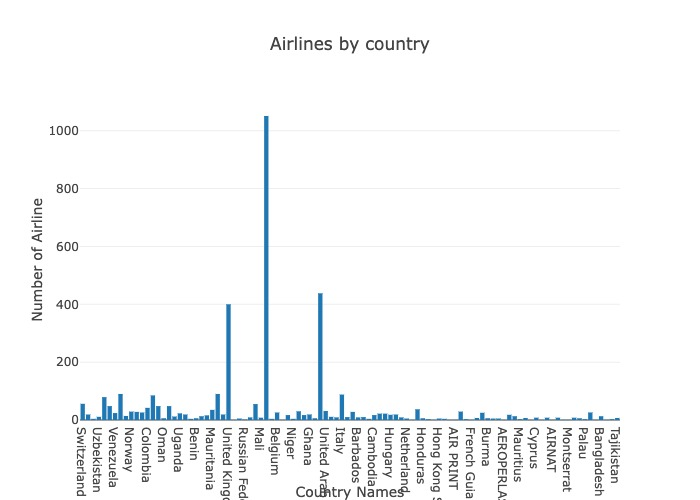

In [13]:
display.Image("/Users/pascalizere/Desktop/files/DE/data/results.jpeg")